### Predicting Survival in the Titanic Data Set

In [75]:
# load all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the Data set

In [81]:
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)

In [53]:
# titanic_original = pd.read_csv(url)

In [82]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### FEATURE ENGINEERING

#### CABIN

As you see the cabin name has been attached to this column. This would not make any significance. Insted we will convert this column to whether Cabin has been provided to the passenger or not

In [83]:
titanic.Cabin = titanic.Cabin.apply(lambda x: 0 if type(x) == float else 1)

In [84]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


#### Create new feature FamilySize as a combination of SibSp and Parch

In [85]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

In [86]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,1


#### Create a column to see if the passenger was alone or not

In [87]:
titanic['IsAlone'] = 0
titanic.loc[titanic["FamilySize"] == 1, "IsAlone"] = 1

#### Convert male and Female to flags

In [88]:
titanic.Sex = titanic.Sex.map({'female':0, 'male':1}).astype(int)

In [89]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,S,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S,1,1


#### Handle the null values

In [43]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
FamilySize       0
IsAlone          0
dtype: int64

In [90]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

##### As the highest number of people hace boarded from Southhampton, replace all the null values with "S"

In [91]:
titanic.Embarked = titanic.Embarked.fillna("S")

In [92]:
# Get the mean of the age
print ("Mean Age : ", titanic.Age.mean())
print ("Median Age : ", titanic.Age.median())


Mean Age :  29.69911764705882
Median Age :  28.0


#### There is no much difference between the mean and the median for the age , so replace all the missing values with the mean

In [93]:
titanic.Age = titanic.Age.fillna(titanic.Age.mean())

In [94]:
print ("Number of Null Values :", titanic.isnull().sum().sum())

Number of Null Values : 0


In [95]:
#### Remove all the columns that dont have any significance
titanic.drop(["PassengerId","Ticket", "Name"], axis=1, inplace=True)

In [96]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone
0,0,3,1,22.0,1,0,7.2500,0,S,2,0
1,1,1,0,38.0,1,0,71.2833,1,C,2,0
2,1,3,0,26.0,0,0,7.9250,0,S,1,1
3,1,1,0,35.0,1,0,53.1000,1,S,2,0
4,0,3,1,35.0,0,0,8.0500,0,S,1,1


#### Convert Embarked to flags
S : 0
C : 1
Q : 2

In [97]:
titanic.Embarked = titanic.Embarked.map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)

In [98]:
titanic.Fare.value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

#### Fare
As you can see there are multiple values for fare. So if the same was to be used in the decision tree there will be multiple nodes created for each of these values. 
<br>
Instead lets group values and assign them a value
<br>
<= 7.91   => 0<br> 
> 7.91 & <= 14.454 => 1<br>
> 14.454 & <= 31 => 2<br>
> 31 => 3<br>    

In [99]:
# Mapping Fare
titanic.loc[ titanic['Fare'] <= 7.91, 'Fare']   = 0
titanic.loc[(titanic['Fare'] > 7.91) & (titanic['Fare'] <= 14.454), 'Fare'] = 1
titanic.loc[(titanic['Fare'] > 14.454) & (titanic['Fare'] <= 31), 'Fare']   = 2
titanic.loc[ titanic['Fare'] > 31, 'Fare'] = 3
titanic['Fare'] = titanic['Fare'].astype(int)

##### AGE

Group age as well:

In [101]:
# Mapping Age
titanic.loc[ titanic['Age'] <= 16, 'Age']= 0
titanic.loc[(titanic['Age'] > 16) & (titanic['Age'] <= 32), 'Age'] = 1
titanic.loc[(titanic['Age'] > 32) & (titanic['Age'] <= 48), 'Age'] = 2
titanic.loc[(titanic['Age'] > 48) & (titanic['Age'] <= 64), 'Age'] = 3
titanic.loc[ titanic['Age'] > 64, 'Age'] = 4;
titanic.Age = titanic.Age.astype(int)

In [102]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone
0,0,3,1,1,1,0,0,0,0,2,0
1,1,1,0,2,1,0,3,1,1,2,0
2,1,3,0,1,0,0,1,0,0,1,1
3,1,1,0,2,1,0,3,1,0,2,0
4,0,3,1,2,0,0,1,0,0,1,1


<b> As you can see above is a better version of the dataset that was provided</b>

#### Problem Statement
You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch(Parents/children aboard), and Fare to predict whether a passenger
survived.

In [103]:
dataset = titanic.drop(["Embarked","FamilySize","IsAlone","Cabin"], axis=1)

In [104]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,1,1,0,0
1,1,1,0,2,1,0,3
2,1,3,0,1,0,0,1
3,1,1,0,2,1,0,3
4,0,3,1,2,0,0,1


#### Display the correlation of all the features on the table

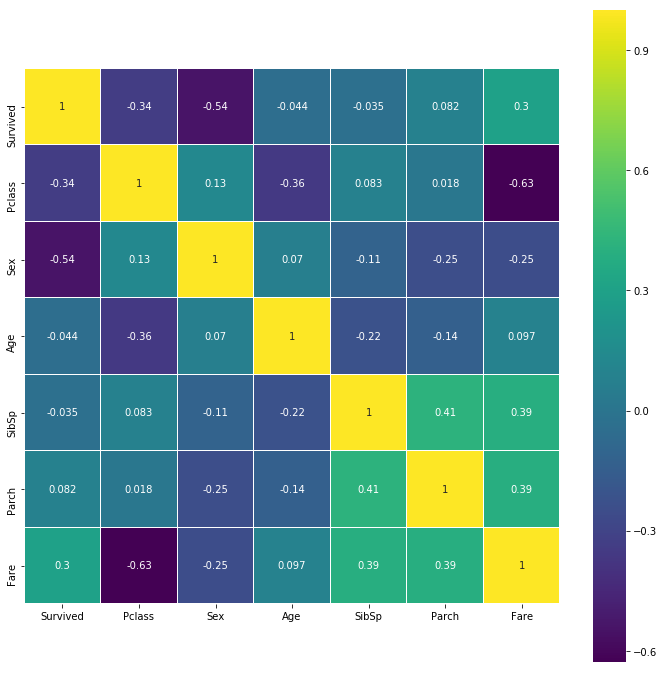

In [105]:
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.viridis, linecolor='white', annot=True)

### DECISION TREE

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [113]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop(['Survived'], axis=1), titanic["Survived"], test_size=0.3)

In [115]:
# Fit
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [116]:
# Predict for test
prediction = dtree.predict(X_test)

In [119]:
confusion_matrix(y_test, prediction)

array([[136,  20],
       [ 34,  78]], dtype=int64)

In [120]:
accuracy_score(y_test, prediction)

0.7985074626865671

### PLOT THE DECISION TREE

In [122]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(titanic.drop(['Survived'], axis=1))

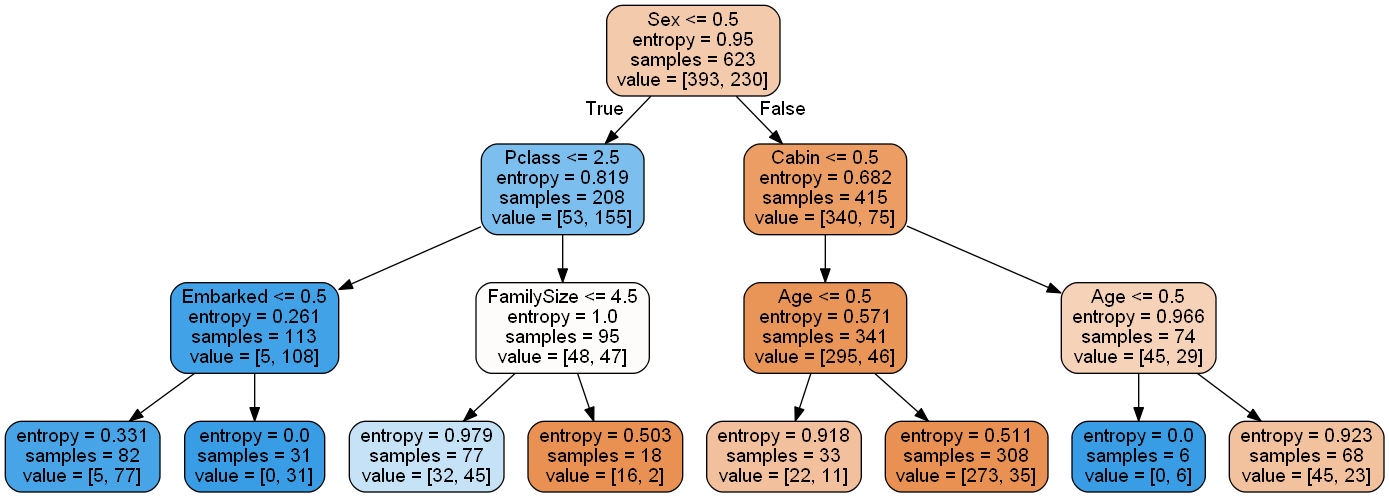

In [123]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())